In [1]:
import acoustics as ac

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

c:\users\oriamu01\appdata\local\continuum\anaconda3\envs\tensortest\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\oriamu01\appdata\local\continuum\anaconda3\envs\tensortest\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\oriamu01\appdata\local\continuum\anaconda3\envs\tensortest\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("q

In [4]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [16]:
import numpy as np
import os
from scipy.io import wavfile

DATADIRtrain = "C:\\Users\\oriamu01\\Desktop\\Convs2\\"
CATEGORIES = ["IR_1_aula_carolina",
              "IR_2_booth",
              "IR_3_lecture_theatre",
              "IR_4_meeting_room",
              "IR_5_stairway",
              "IR_6_corridor",
              "IR_7_kitchen",
              "IR_8_bathroom"]

NAME = "CNN-Cepstral-all-100-3secs{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs\\{}'.format(NAME))

In [6]:
def normalise(Wave, HighThresh, LowThresh):
    norm = []
    list_min = np.min(Wave)
    list_max = np.max(Wave)
    
    for i in Wave:
        norm.append((( (HighThresh - LowThresh) * (( i - list_min)/(list_max - list_min)) ) - (HighThresh)))
        
    normalised = np.array(norm)
    
    return(normalised)


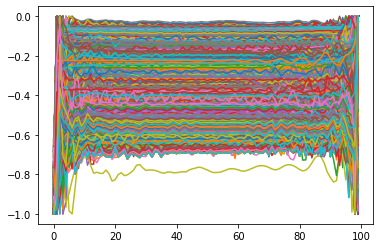

In [17]:
training_data = []


def create_training_data():

    for category in CATEGORIES:
        path = os.path.join(DATADIRtrain, category)
        class_num = (CATEGORIES.index(category))
        for file in os.listdir(path):
            try:
                wavdata = wavfile.read(os.path.join(path,file))
                trunc_wav = np.resize(wavdata[1],(3*44100,))#only take the first 4 seconds of each wav
                ceps = ac.cepstrum.complex_cepstrum(trunc_wav,100)
                normalised_ceps = normalise(ceps[0], 1, 0)
                
                plt.plot(normalised_ceps)
                
                training_data.append([normalised_ceps, class_num])
            except Exception as e:
                pass

create_training_data()

[array([-1.        , -0.22559524, -0.18854602, -0.17428163, -0.17006485,
       -0.16572865, -0.16495737, -0.16228812, -0.16258561, -0.16068757,
       -0.16068967, -0.15985252, -0.16029052, -0.15897954, -0.1595902 ,
       -0.15751923, -0.15861588, -0.15587185, -0.15811638, -0.15642132,
       -0.15610457, -0.15484456, -0.15584953, -0.15578345, -0.15536676,
       -0.15369069, -0.15534928, -0.15415471, -0.15504445, -0.15293121,
       -0.15419519, -0.15289422, -0.15402271, -0.15231635, -0.15394903,
       -0.1530903 , -0.15464274, -0.15401646, -0.15571201, -0.15504117,
       -0.1562329 , -0.15568318, -0.15605167, -0.15490506, -0.15741111,
       -0.15548165, -0.1563414 , -0.15446288, -0.15610899, -0.15448546,
       -0.15520201, -0.15414835, -0.15450063, -0.15353887, -0.15487872,
       -0.15292067, -0.15454153, -0.15295199, -0.15443909, -0.15281198,
       -0.15416563, -0.15342214, -0.15470019, -0.1541976 , -0.15525741,
       -0.15411158, -0.15583614, -0.1543405 , -0.15630318, -0.1

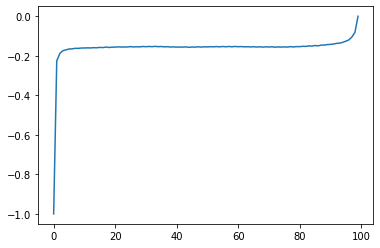

In [18]:
#for sample in training_data:

print (training_data[1])
plt.plot(training_data[1][0])


In [19]:
import random
random.shuffle(training_data)



4


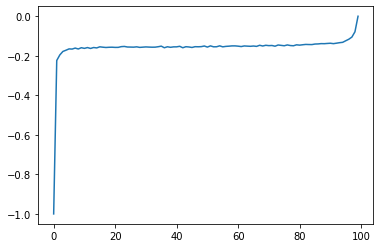

In [20]:
#for sample in training_data:
#print (training_data[1])
plt.plot(training_data[1][0])
print(training_data[1][1])

In [21]:
#training data
Xtr = []
ytr = []



In [22]:
for features, labels in training_data:
        Xtr.append(features)
        ytr.append(labels)

In [23]:
xtr = np.array(Xtr)
Ytr = np.array(ytr)

In [24]:
newxtr = xtr.reshape(len(xtr),10,10)
newYtr = Ytr.reshape(len(Ytr))
print(newYtr.shape)
print(Ytr.shape)
print(xtr.shape)
print(newxtr.shape[1:])


(4780,)
(4780,)
(4780, 100)
(10, 10)


In [25]:


from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.layers import Embedding
from tensorflow.python.keras.layers import Conv1D, Conv2D, GlobalAveragePooling1D, MaxPooling1D

#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu,))
#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu,))
#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu,))
#model.add(tf.keras.layers.Dense(2, activation=tf.nn.sigmoid,))



model = Sequential()

model.add(Conv1D(6, 1, activation='relu', input_shape= newxtr.shape[1:])) #400 samples in 441 steps = 4 seconds
model.add(Conv1D(6, 1, activation='relu'))
model.add(MaxPooling1D(3)) # maxpool / downsample features by a third

model.add(Conv1D(10, 1, activation='relu'))
model.add(Conv1D(10, 1, activation='relu'))
model.add(GlobalAveragePooling1D())

model.add(Dropout(0.5))
model.add(Dense(8,activation='softmax'))


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(newxtr, Ytr, epochs=200, validation_split=0.1, callbacks=[tensorboard])


Train on 4302 samples, validate on 478 samples
Epoch 1/200
4302/4302 [==============================] - 1s 132us/sample - loss: 2.0370 - acc: 0.1557 - val_loss: 1.9405 - val_acc: 0.2197
Epoch 2/200
4302/4302 [==============================] - 0s 84us/sample - loss: 1.9210 - acc: 0.2064 - val_loss: 1.7967 - val_acc: 0.2259
Epoch 3/200
4302/4302 [==============================] - 0s 85us/sample - loss: 1.8323 - acc: 0.2169 - val_loss: 1.6412 - val_acc: 0.2385
Epoch 4/200
4302/4302 [==============================] - 0s 91us/sample - loss: 1.6987 - acc: 0.2308 - val_loss: 1.5402 - val_acc: 0.2615
Epoch 5/200
4302/4302 [==============================] - 0s 82us/sample - loss: 1.6569 - acc: 0.2273 - val_loss: 1.5037 - val_acc: 0.2699
Epoch 6/200
4302/4302 [==============================] - 0s 80us/sample - loss: 1.6221 - acc: 0.2187 - val_loss: 1.4755 - val_acc: 0.2490
Epoch 7/200
4302/4302 [==============================] - 0s 88us/sample - loss: 1.5932 - acc: 0.2352 - val_loss: 1.4611 - va

4302/4302 [==============================] - 0s 104us/sample - loss: 1.3865 - acc: 0.4238 - val_loss: 1.1974 - val_acc: 0.5293
Epoch 60/200
4302/4302 [==============================] - 0s 79us/sample - loss: 1.3819 - acc: 0.4258 - val_loss: 1.1978 - val_acc: 0.5858
Epoch 61/200
4302/4302 [==============================] - 0s 81us/sample - loss: 1.3838 - acc: 0.4145 - val_loss: 1.1970 - val_acc: 0.5397
Epoch 62/200
4302/4302 [==============================] - 1s 153us/sample - loss: 1.3859 - acc: 0.4161 - val_loss: 1.1938 - val_acc: 0.5795
Epoch 63/200
4302/4302 [==============================] - 1s 143us/sample - loss: 1.3847 - acc: 0.4226 - val_loss: 1.2006 - val_acc: 0.5837
Epoch 64/200
4302/4302 [==============================] - 0s 86us/sample - loss: 1.3909 - acc: 0.4245 - val_loss: 1.1902 - val_acc: 0.5753
Epoch 65/200
4302/4302 [==============================] - 0s 79us/sample - loss: 1.4017 - acc: 0.4159 - val_loss: 1.1939 - val_acc: 0.5816
Epoch 66/200
4302/4302 [=============

Epoch 118/200
4302/4302 [==============================] - 0s 81us/sample - loss: 1.3163 - acc: 0.4398 - val_loss: 1.0887 - val_acc: 0.6151
Epoch 119/200
4302/4302 [==============================] - 0s 82us/sample - loss: 1.3163 - acc: 0.4414 - val_loss: 1.0882 - val_acc: 0.6172
Epoch 120/200
4302/4302 [==============================] - 0s 84us/sample - loss: 1.3166 - acc: 0.4461 - val_loss: 1.0923 - val_acc: 0.6088
Epoch 121/200
4302/4302 [==============================] - 1s 139us/sample - loss: 1.3074 - acc: 0.4444 - val_loss: 1.0902 - val_acc: 0.6046
Epoch 122/200
4302/4302 [==============================] - 1s 121us/sample - loss: 1.3193 - acc: 0.4403 - val_loss: 1.0925 - val_acc: 0.5669
Epoch 123/200
4302/4302 [==============================] - 1s 131us/sample - loss: 1.3053 - acc: 0.4447 - val_loss: 1.0905 - val_acc: 0.5774
Epoch 124/200
4302/4302 [==============================] - 1s 137us/sample - loss: 1.3053 - acc: 0.4505 - val_loss: 1.0873 - val_acc: 0.5858
Epoch 125/200
43

4302/4302 [==============================] - 0s 93us/sample - loss: 1.2943 - acc: 0.4547 - val_loss: 1.0520 - val_acc: 0.5900
Epoch 177/200
4302/4302 [==============================] - 0s 89us/sample - loss: 1.2851 - acc: 0.4626 - val_loss: 1.0555 - val_acc: 0.6548
Epoch 178/200
4302/4302 [==============================] - 0s 100us/sample - loss: 1.2763 - acc: 0.4649 - val_loss: 1.0506 - val_acc: 0.6151
Epoch 179/200
4302/4302 [==============================] - 0s 76us/sample - loss: 1.2835 - acc: 0.4614 - val_loss: 1.0519 - val_acc: 0.6444
Epoch 180/200
4302/4302 [==============================] - 0s 80us/sample - loss: 1.2759 - acc: 0.4633 - val_loss: 1.0475 - val_acc: 0.6360
Epoch 181/200
4302/4302 [==============================] - 0s 87us/sample - loss: 1.2854 - acc: 0.4654 - val_loss: 1.0506 - val_acc: 0.6444
Epoch 182/200
4302/4302 [==============================] - 0s 87us/sample - loss: 1.2907 - acc: 0.4682 - val_loss: 1.0457 - val_acc: 0.6360
Epoch 183/200
4302/4302 [========